## Context

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.


## Attribute Information

1. `Age:` age of the patient [`years`]
2. `Sex:` sex of the patient [`M: Male, F: Female`]
3. `ChestPainType:` chest pain type [`TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic`]
4. `RestingBP:` resting blood pressure [mm Hg]
5. `Cholesterol:` serum cholesterol [mm/dl]
6. `FastingBS:` fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise`]
7. `RestingECG`: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), 8 LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
8. `MaxHR:` maximum heart rate achieved [Numeric value between 60 and 202]
9. `ExerciseAngina:` exercise-induced angina [Y: Yes, N: No]
10. `Oldpeak: `oldpeak = ST [Numeric value measured in depression]
11. `ST_Slope:` the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
12. `HeartDisease:` output class [1: heart disease, 0: Normal]


## Import Statement


In [33]:
# Data Analysis:
import pandas as pd
import numpy as np

# Data Visulization:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Model Training:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## Reading Data


In [3]:
df = pd.read_csv("heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


## Exploratory Data Analysis


### Relation b/w Sex that has heat Attack


In [6]:
male_count_1 = df[(df["Sex"] == "M") & (df["HeartDisease"] == 1)]["Sex"].count()
female_count_1 = df[(df["Sex"] == "F") & (df["HeartDisease"] == 1)]["Sex"].count()

fig = px.pie(
    data_frame=df,
    values=[male_count_1, female_count_1],
    labels=["Male", "Female"],
    names=["Male", "Female"],
    color_discrete_sequence=["crimson", "dodgerblue"],
)

fig.update_layout(
    legend_title_text="Sex",
)

fig.update_traces(
    textinfo="label+percent",
)

fig.show()

### Relation B/W Sex with no HeartDisease


In [7]:
male_count_0 = df[(df["Sex"] == "M") & (df["HeartDisease"] == 0)]["Sex"].count()
female_count_0 = df[(df["Sex"] == "F") & (df["HeartDisease"] == 0)]["Sex"].count()

fig = px.pie(
    data_frame=df,
    title="Relation b/w Sex that has heat Attack",
    values=[male_count_0, female_count_0],
    labels=["Male", "Female"],
    names=["Male", "Female"],
    color_discrete_sequence=["dodgerblue", "crimson"],
)

fig.update_layout(
    legend_title_text="Sex",
)

fig.update_traces(
    textinfo="label+percent",
)

fig.show()

In [8]:
ASY = df[(df["ChestPainType"] == "ASY") & (df["HeartDisease"] == 1)][
    "ChestPainType"
].count()
NAP = df[(df["ChestPainType"] == "NAP") & (df["HeartDisease"] == 1)][
    "ChestPainType"
].count()
ATA = df[(df["ChestPainType"] == "ATA") & (df["HeartDisease"] == 1)][
    "ChestPainType"
].count()
TA = df[(df["ChestPainType"] == "TA") & (df["HeartDisease"] == 1)][
    "ChestPainType"
].count()

fig = px.pie(
    data_frame=df,
    title="Chest Pain with most HeartAttacks",
    values=[ASY, NAP, ATA, TA],
    labels=["ASY", "NAP", "ATA", "TA"],
    names=["ASY", "NAP", "ATA", "TA"],
    color_discrete_sequence=["dodgerblue", "crimson", "orange", "purple"],
    hole=0.122,
)

fig.update_layout(
    legend_title_text="Types of Chest Pain",
)

fig.update_traces(
    textposition="outside",
    textinfo="label+percent",
)

fig.show()

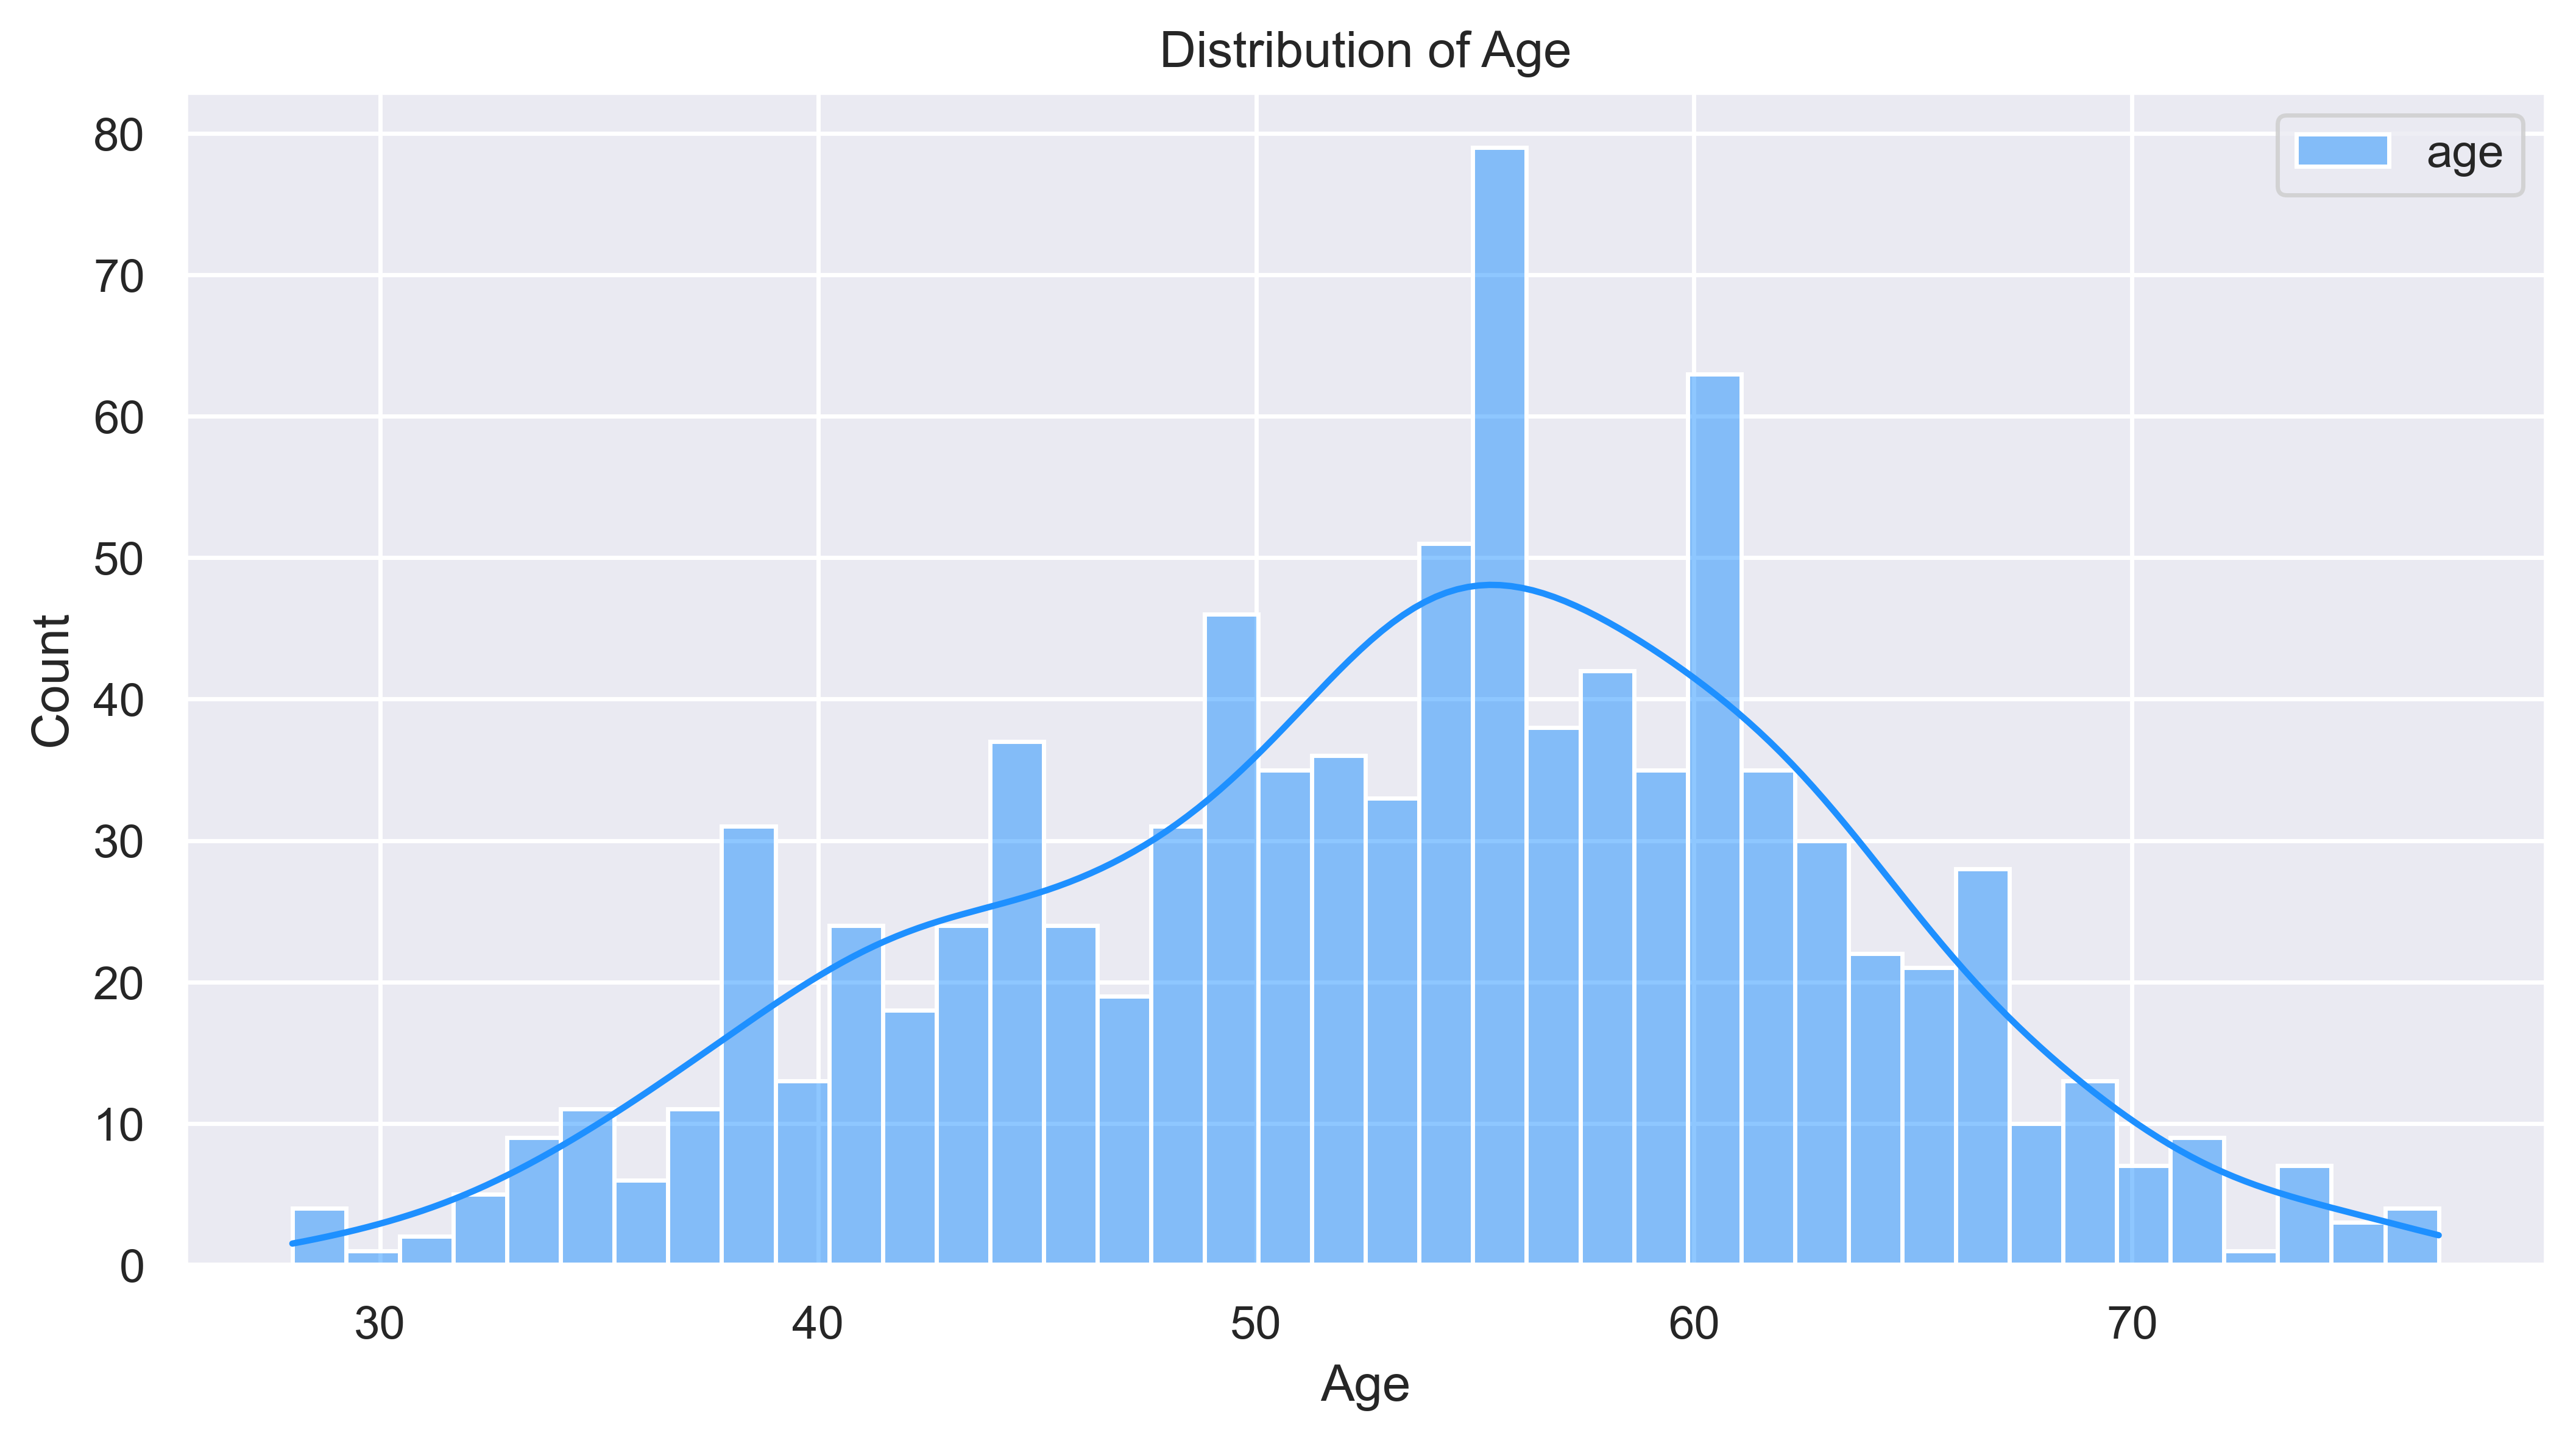

In [9]:
sns.set_theme("notebook")
plt.figure(figsize=(10, 5), dpi=500)
plt.title("Distribution of Age")

sns.histplot(
    data=df,
    x="Age",
    color="dodgerblue",
    bins=40,
    kde=True,
    label="age",
)

plt.legend()

<Axes: xlabel='HeartDisease', ylabel='count'>

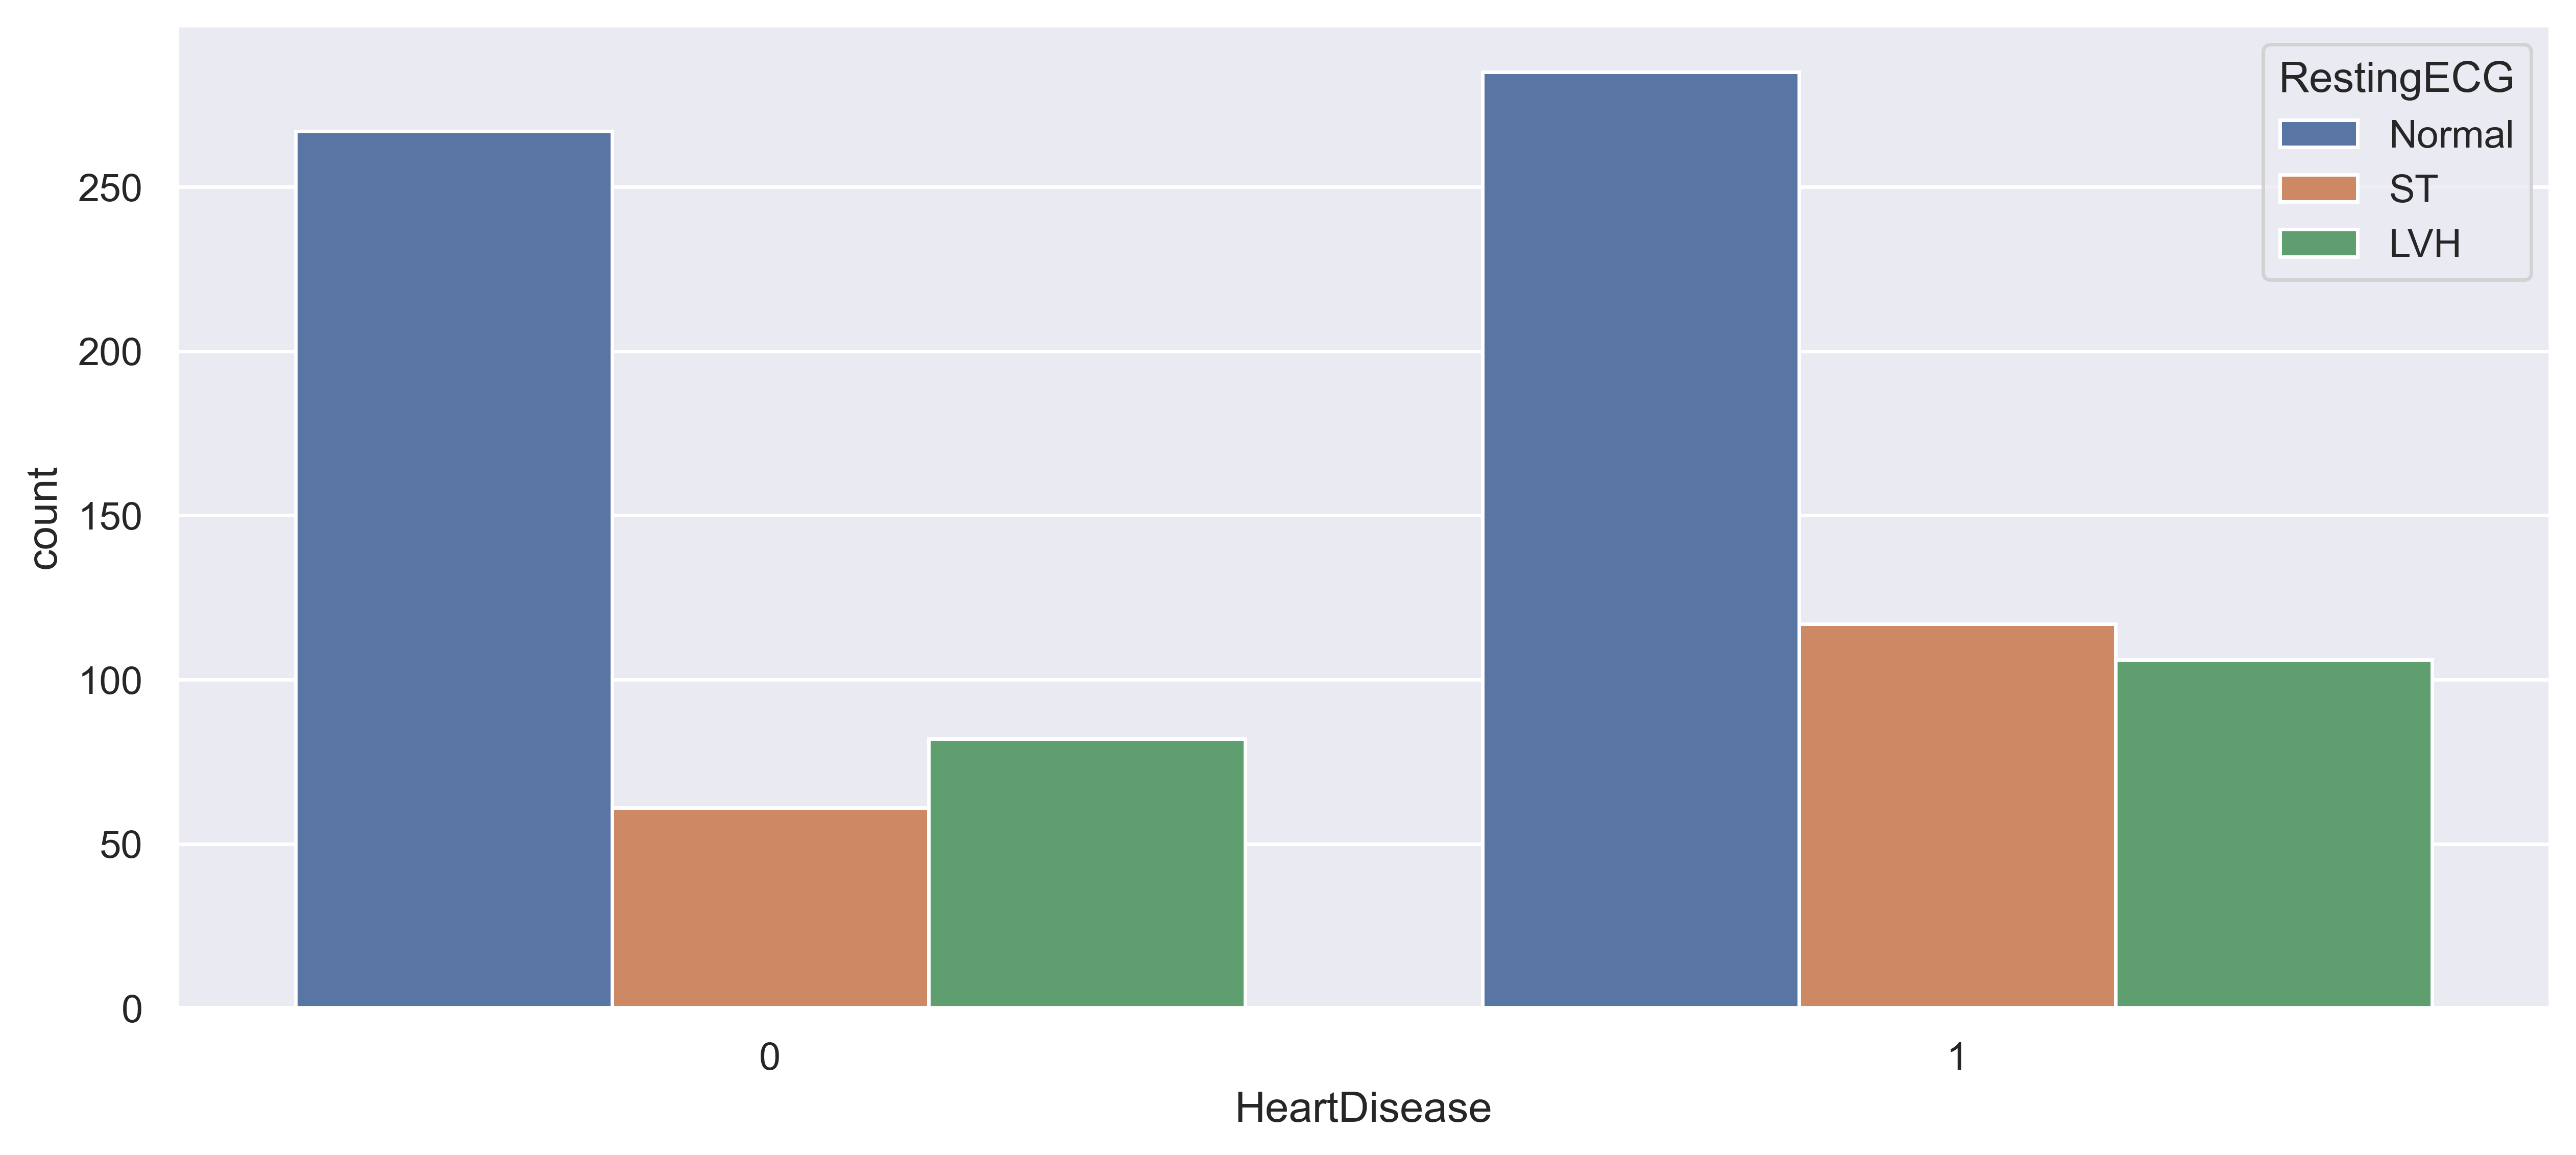

In [10]:
plt.figure(figsize=(12, 5), dpi=500)

sns.countplot(
    data=df,
    x="HeartDisease",
    hue="RestingECG",
)

<Axes: xlabel='HeartDisease', ylabel='count'>

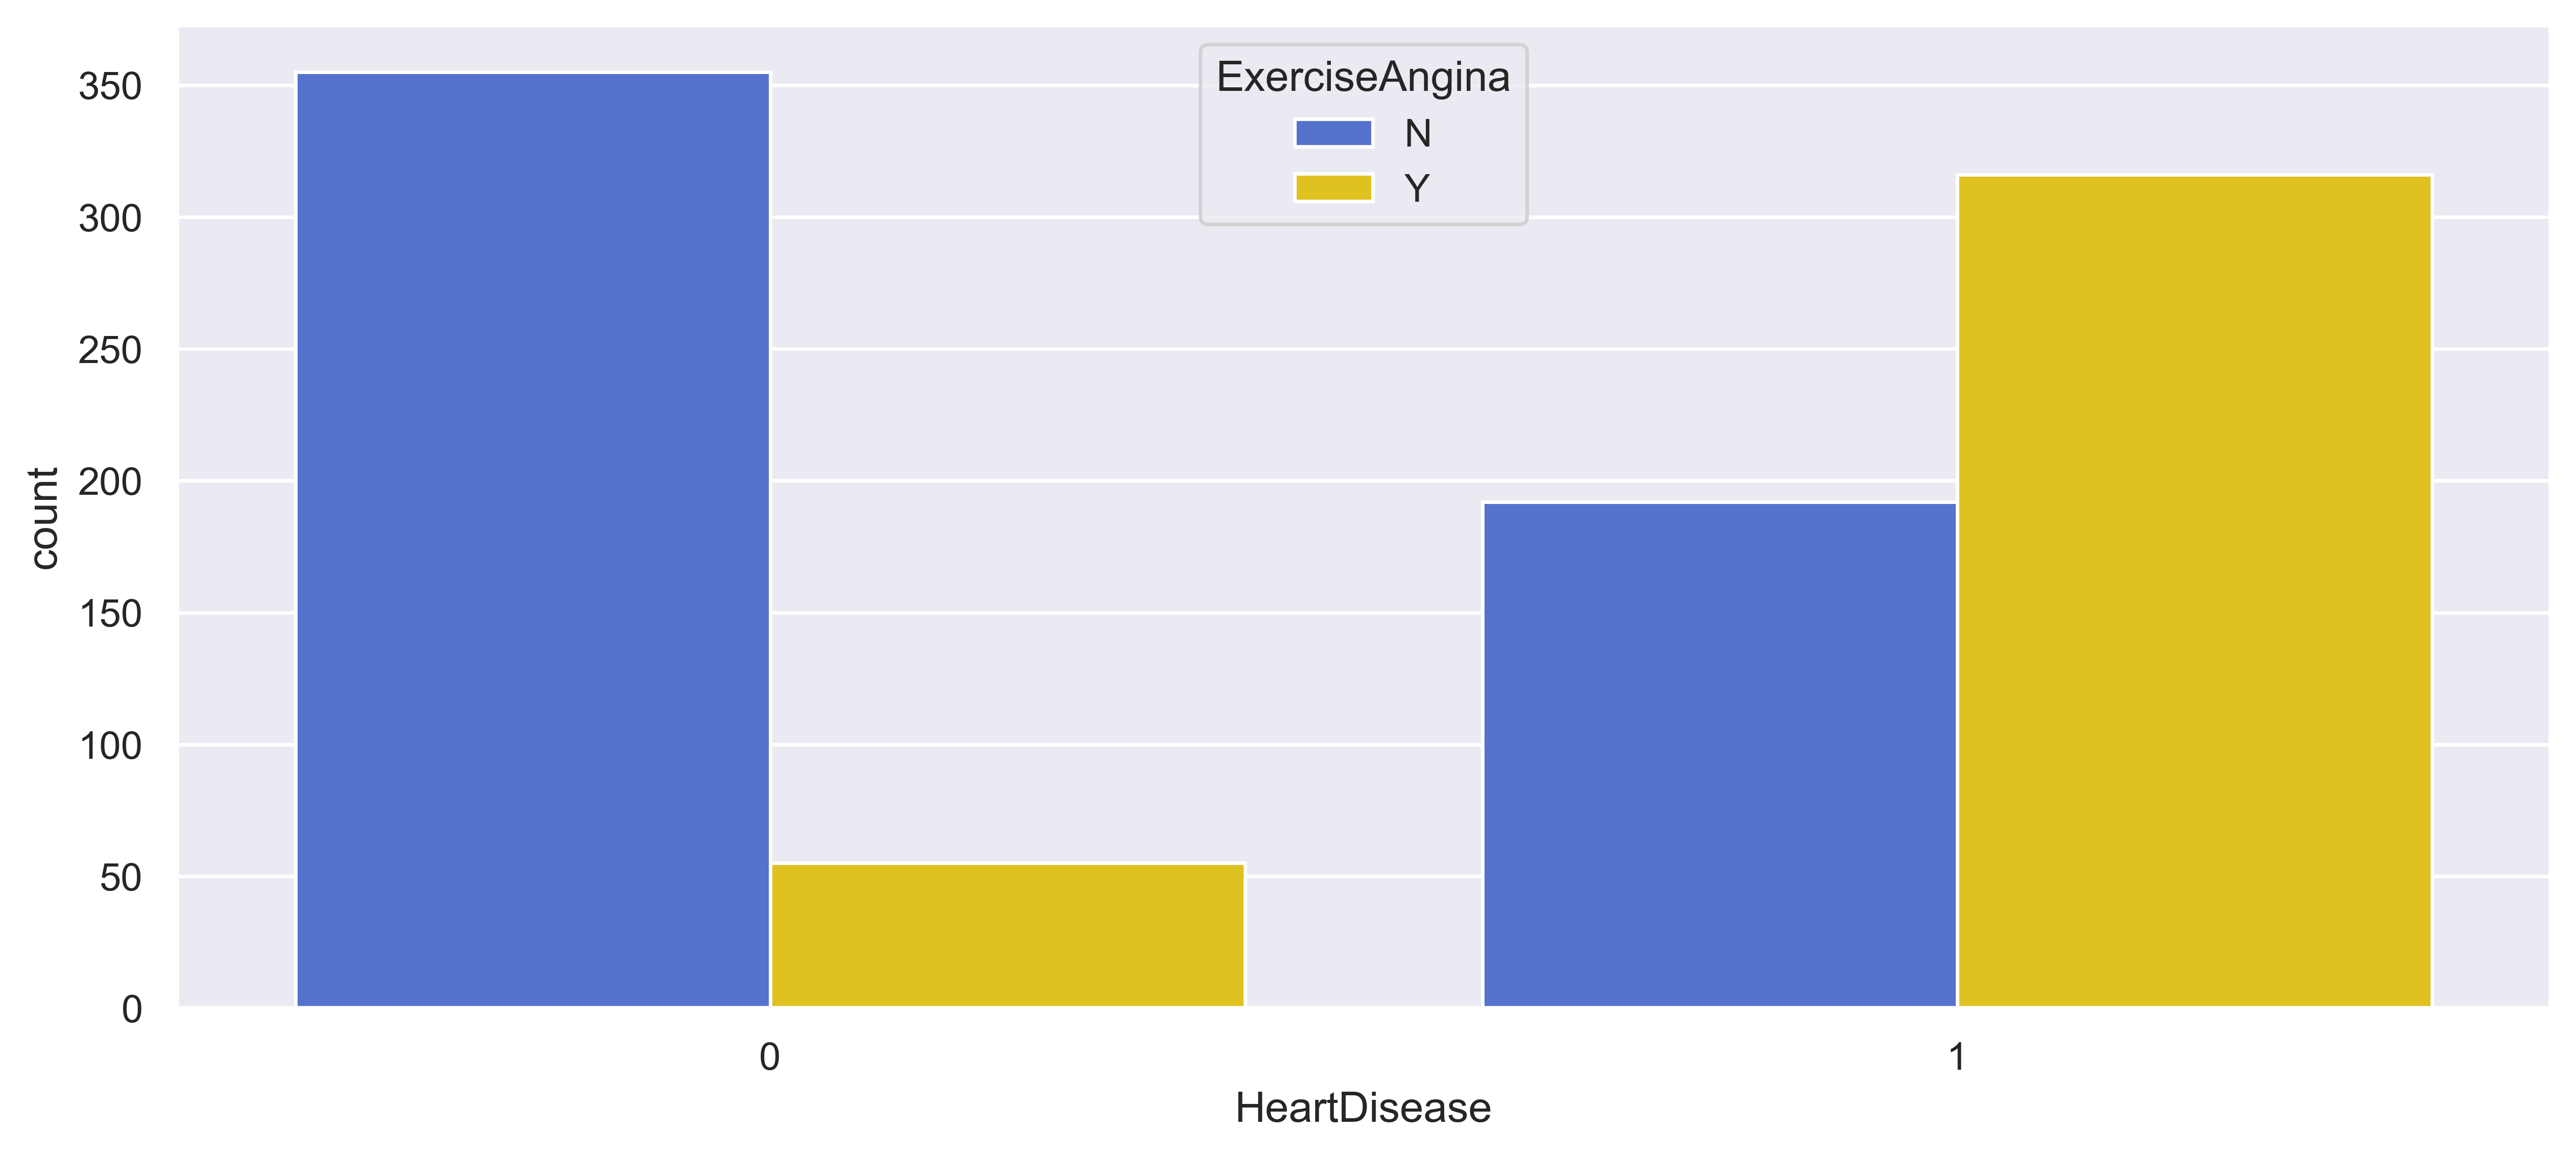

In [11]:
plt.figure(figsize=(12, 5), dpi=500)

sns.countplot(
    data=df,
    x="HeartDisease",
    hue="ExerciseAngina",
    palette=["#4169E1", "#FFD700"],
)

<Axes: title={'center': 'Distribution OldPeak'}, xlabel='Oldpeak', ylabel='Count'>

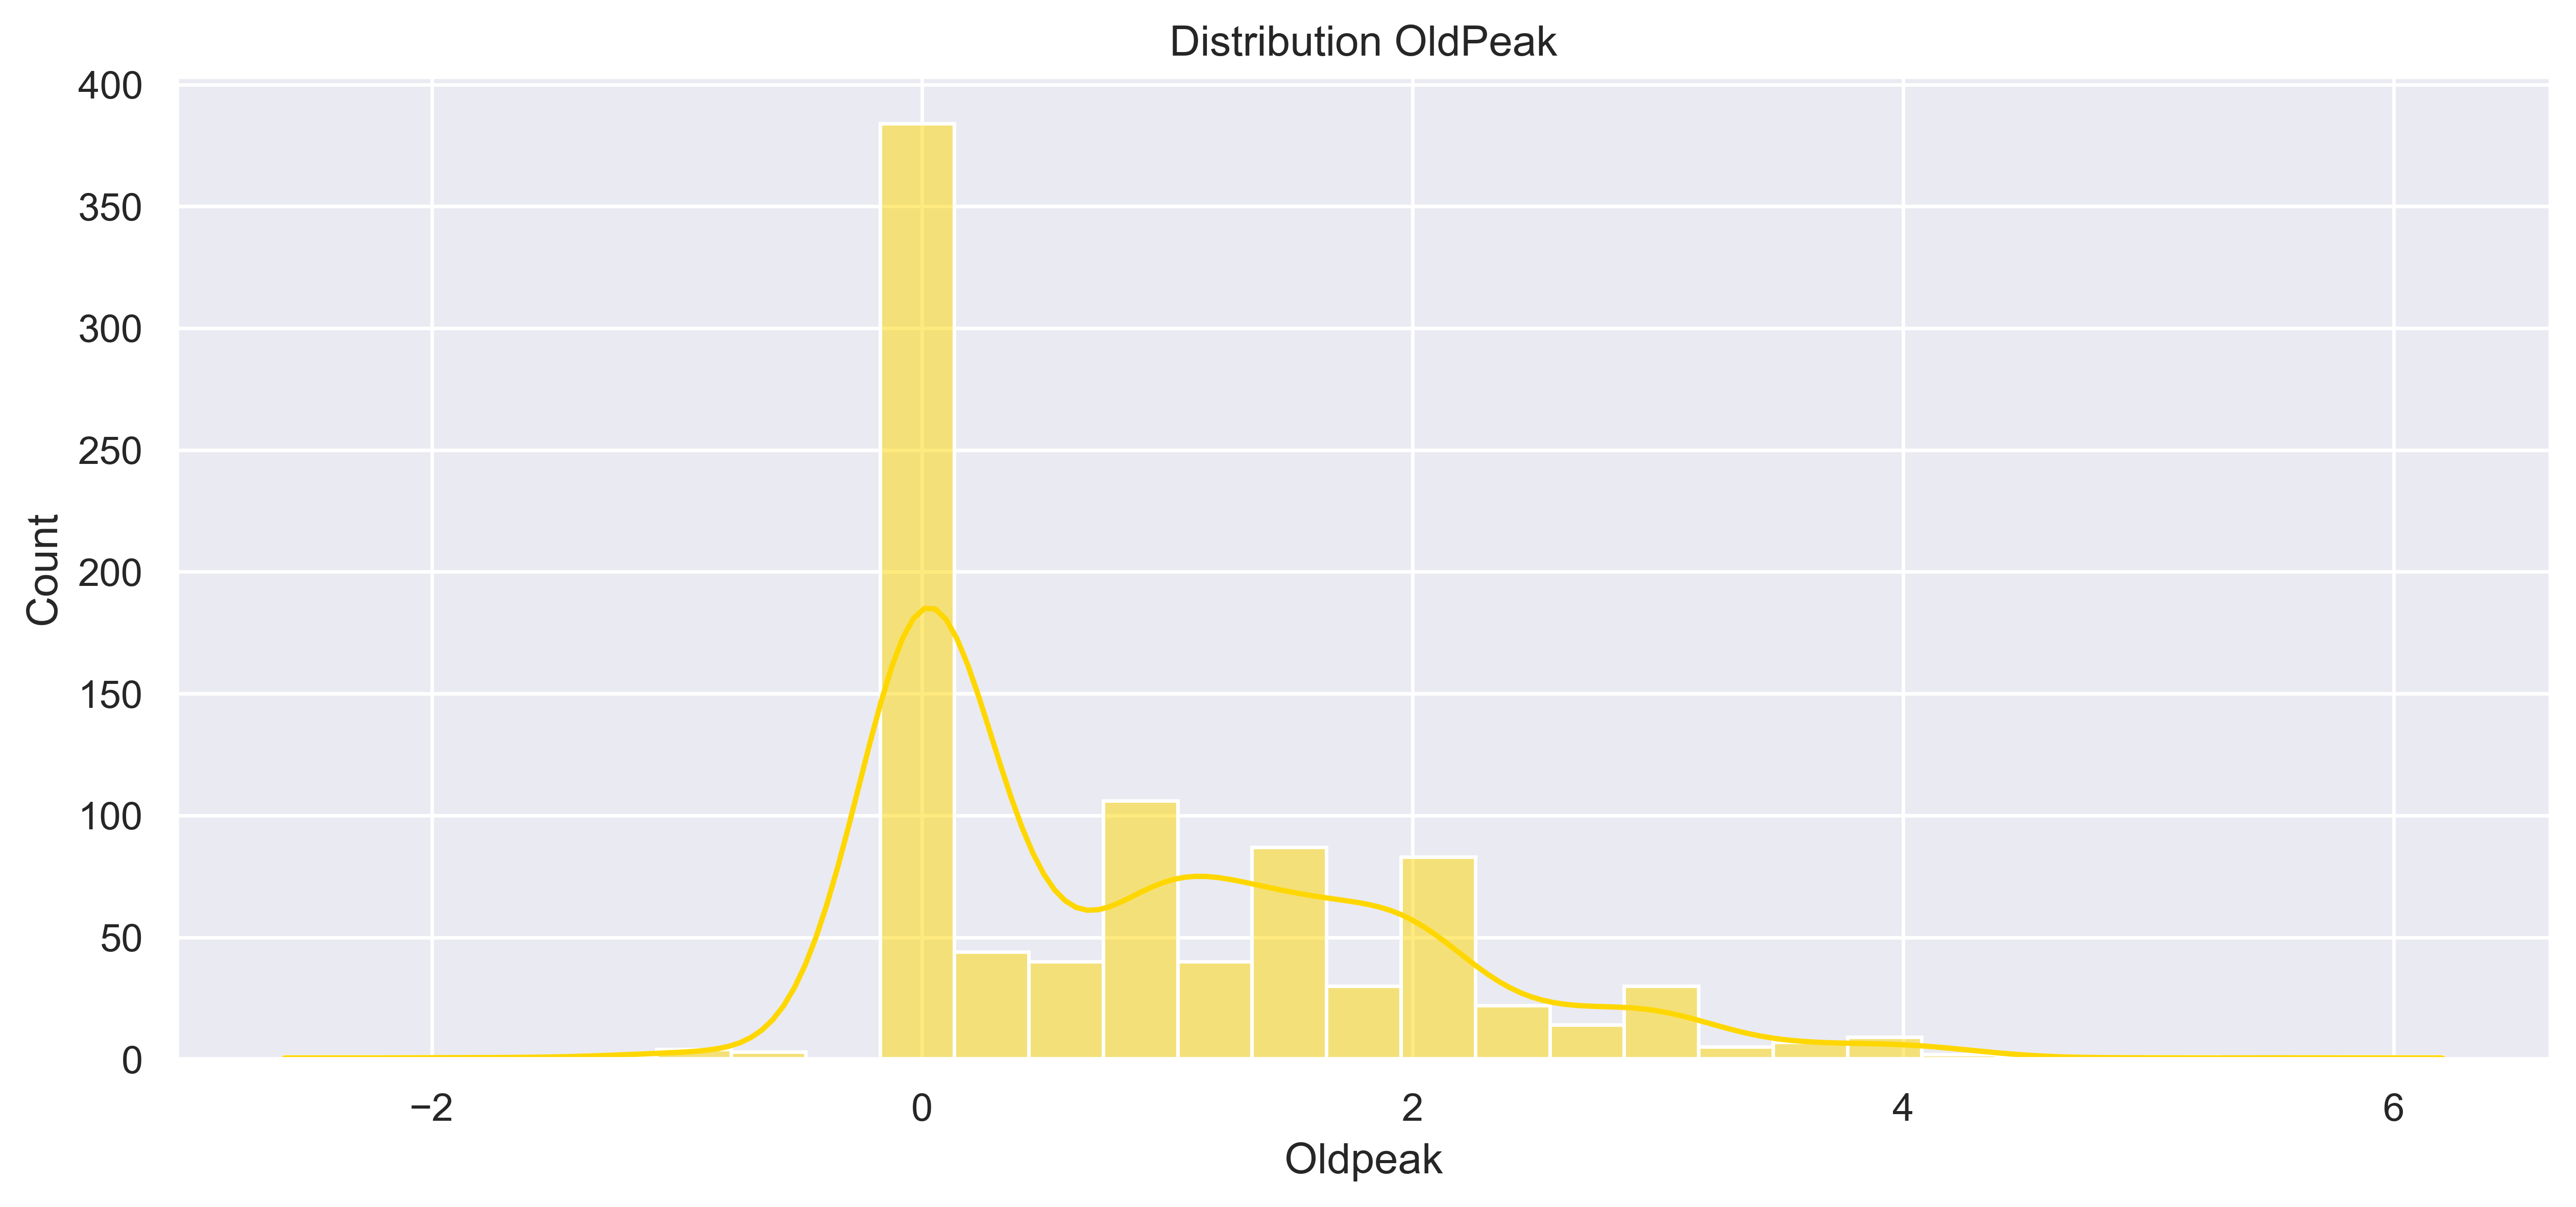

In [12]:
plt.figure(figsize=(12, 5), dpi=500)
plt.title("Distribution OldPeak")

sns.histplot(
    data=df,
    x="Oldpeak",
    color="#FFD700",
    kde=True,
)

<Axes: >

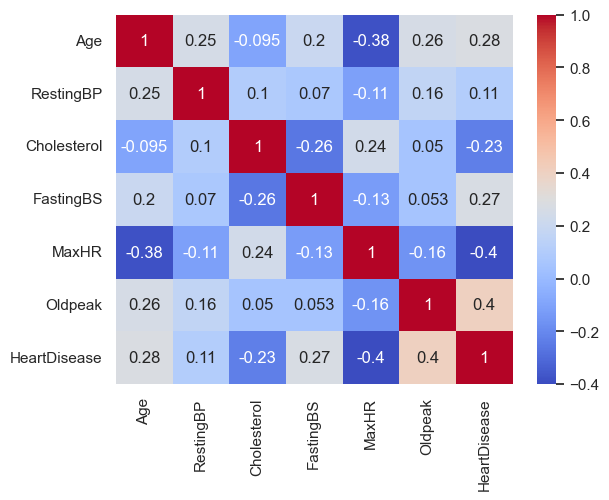

In [13]:
df_numeric = df.select_dtypes(include=[int, float])
sns.heatmap(
    data=df_numeric.corr(),
    annot=True,
    cmap="coolwarm",
)

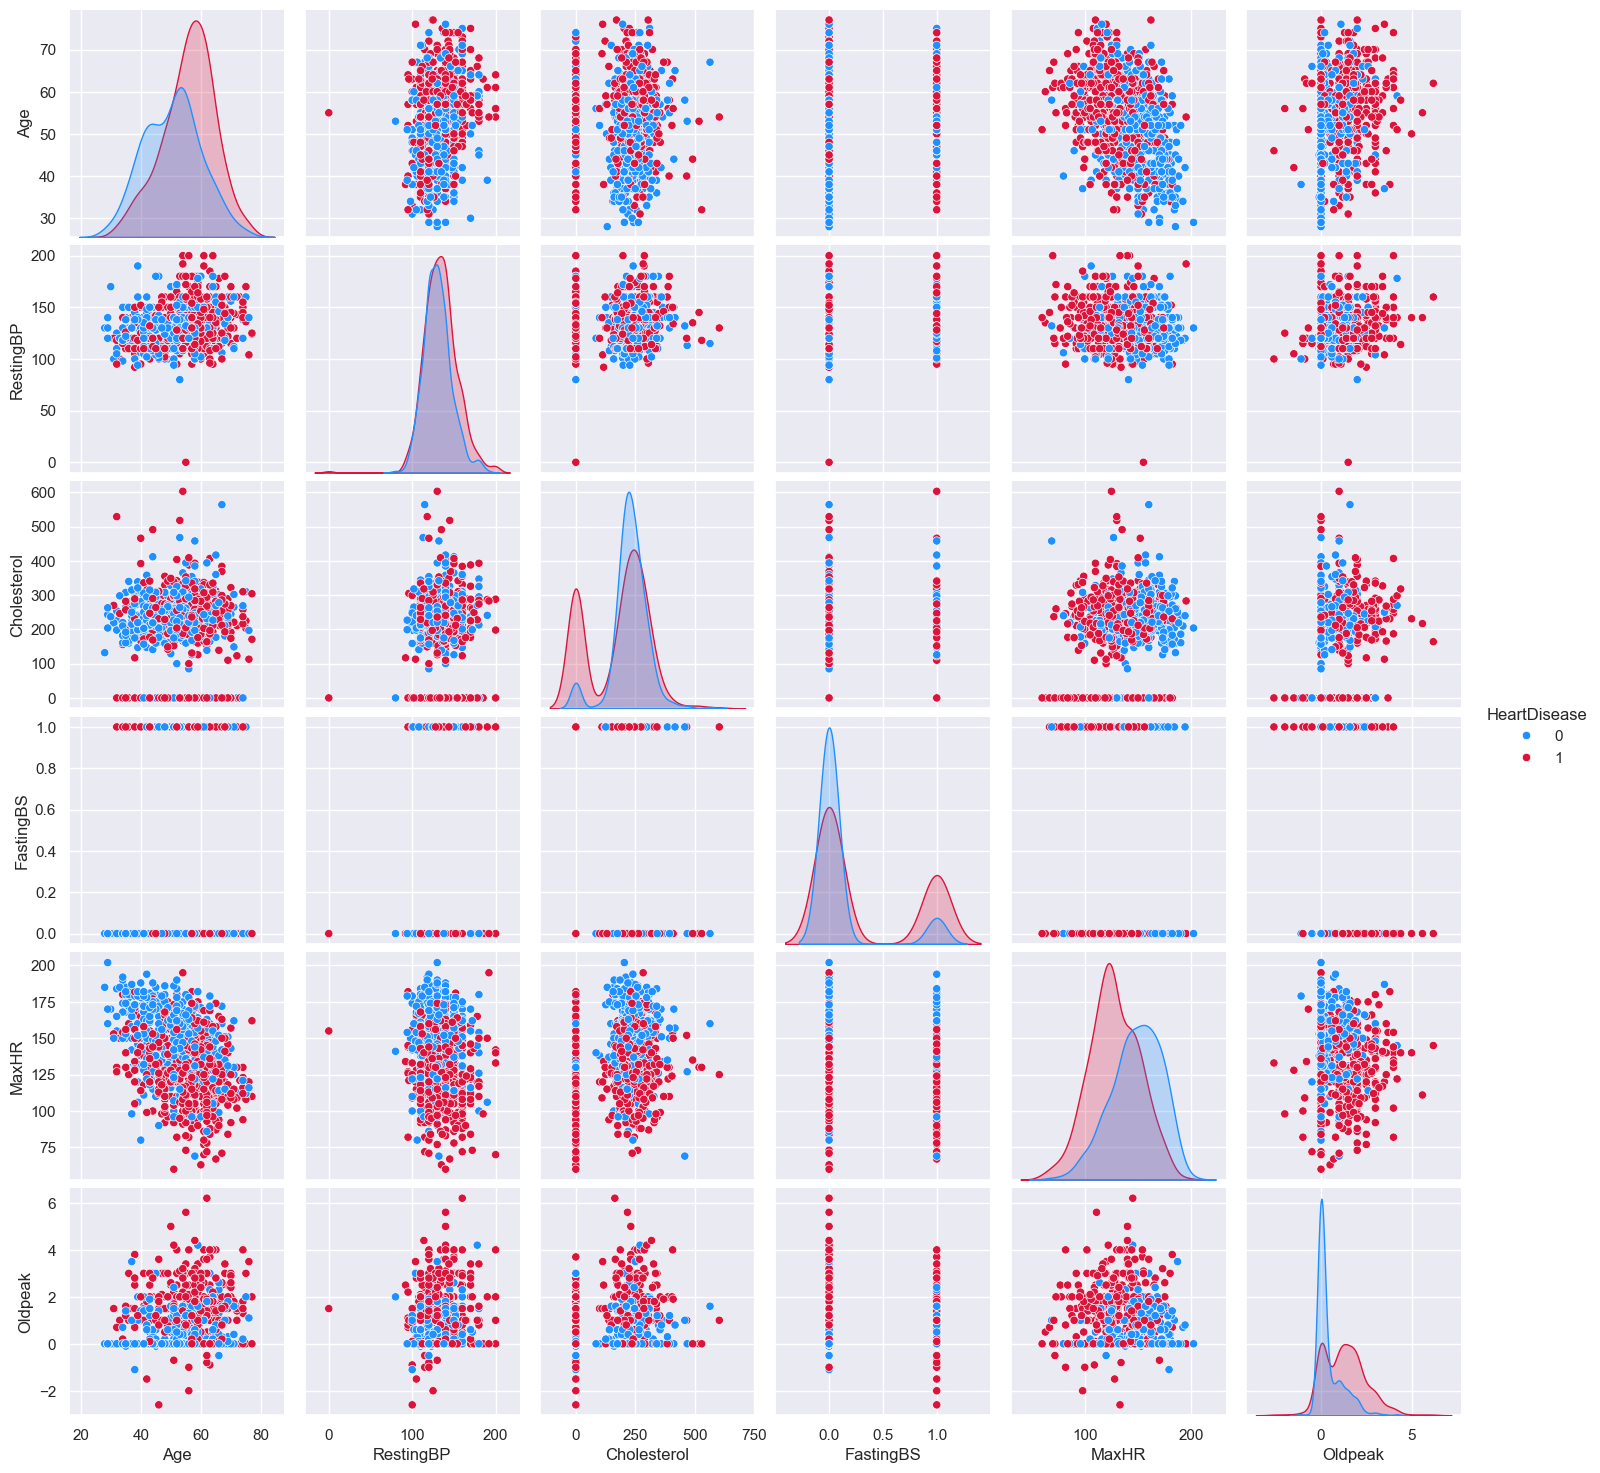

In [14]:
sns.pairplot(
    df,
    hue="HeartDisease",
    palette=["dodgerblue", "crimson"],
    aspect=1,
)

<Axes: title={'center': 'Distribution OldPeak'}, xlabel='HeartDisease', ylabel='count'>

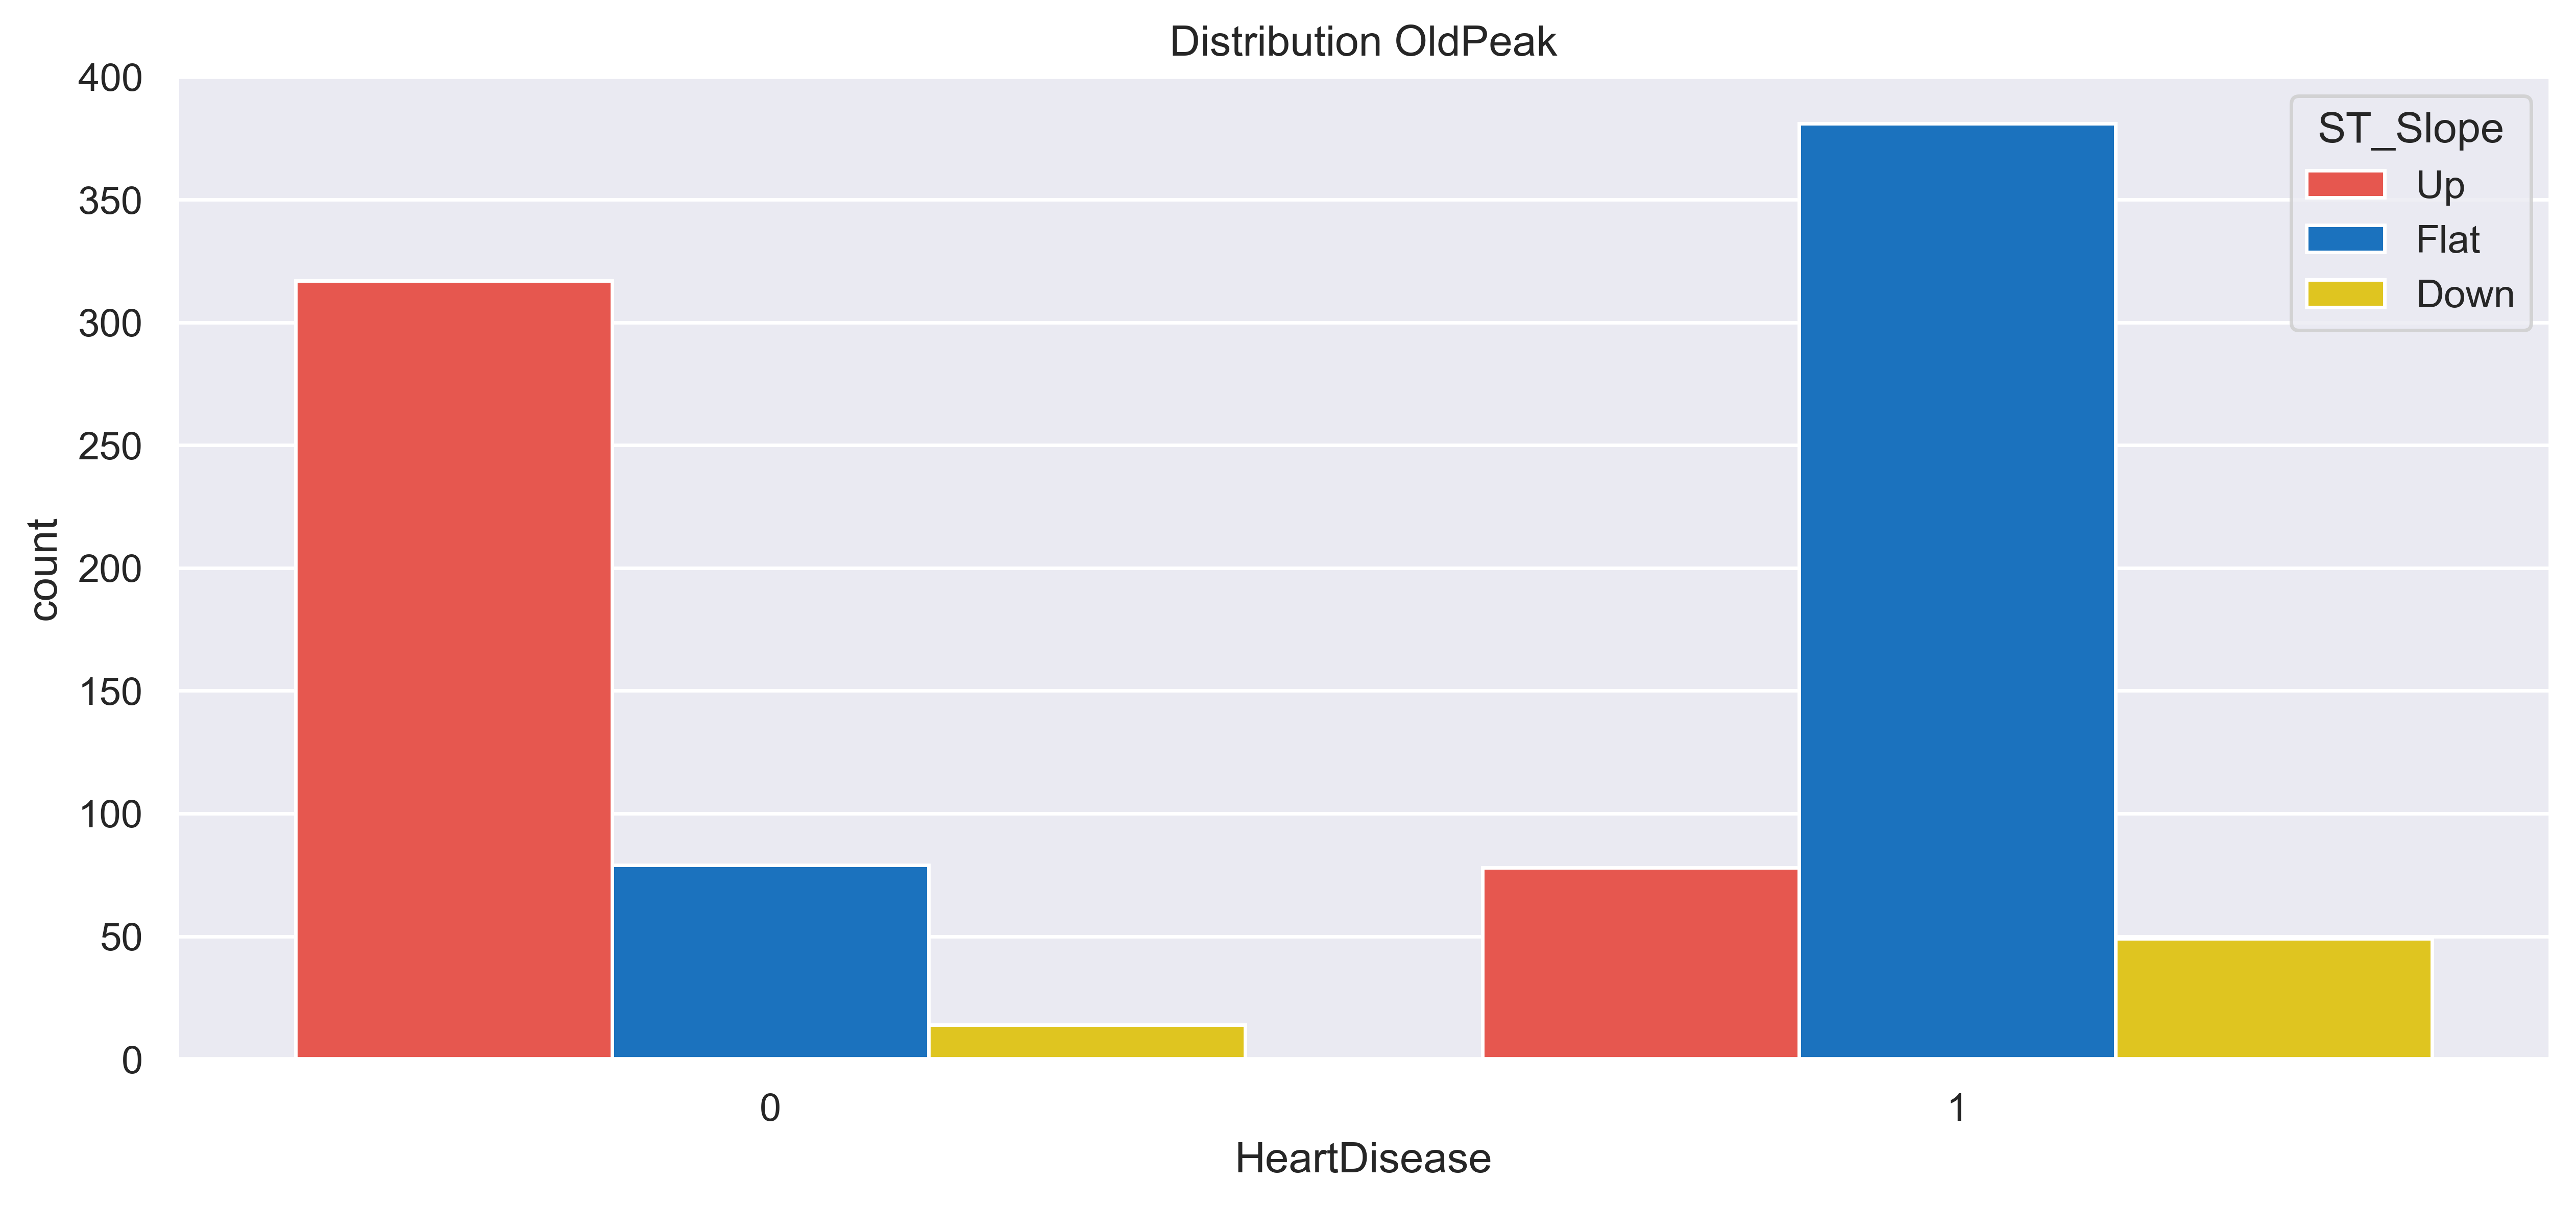

In [18]:
plt.figure(figsize=(12, 5), dpi=500)
plt.title("Distribution OldPeak")

sns.countplot(
    data=df,
    x="HeartDisease",
    hue="ST_Slope",
    palette=[
        "#FF4136",
        "#0074D9",
        "#FFDC00",
    ],
)

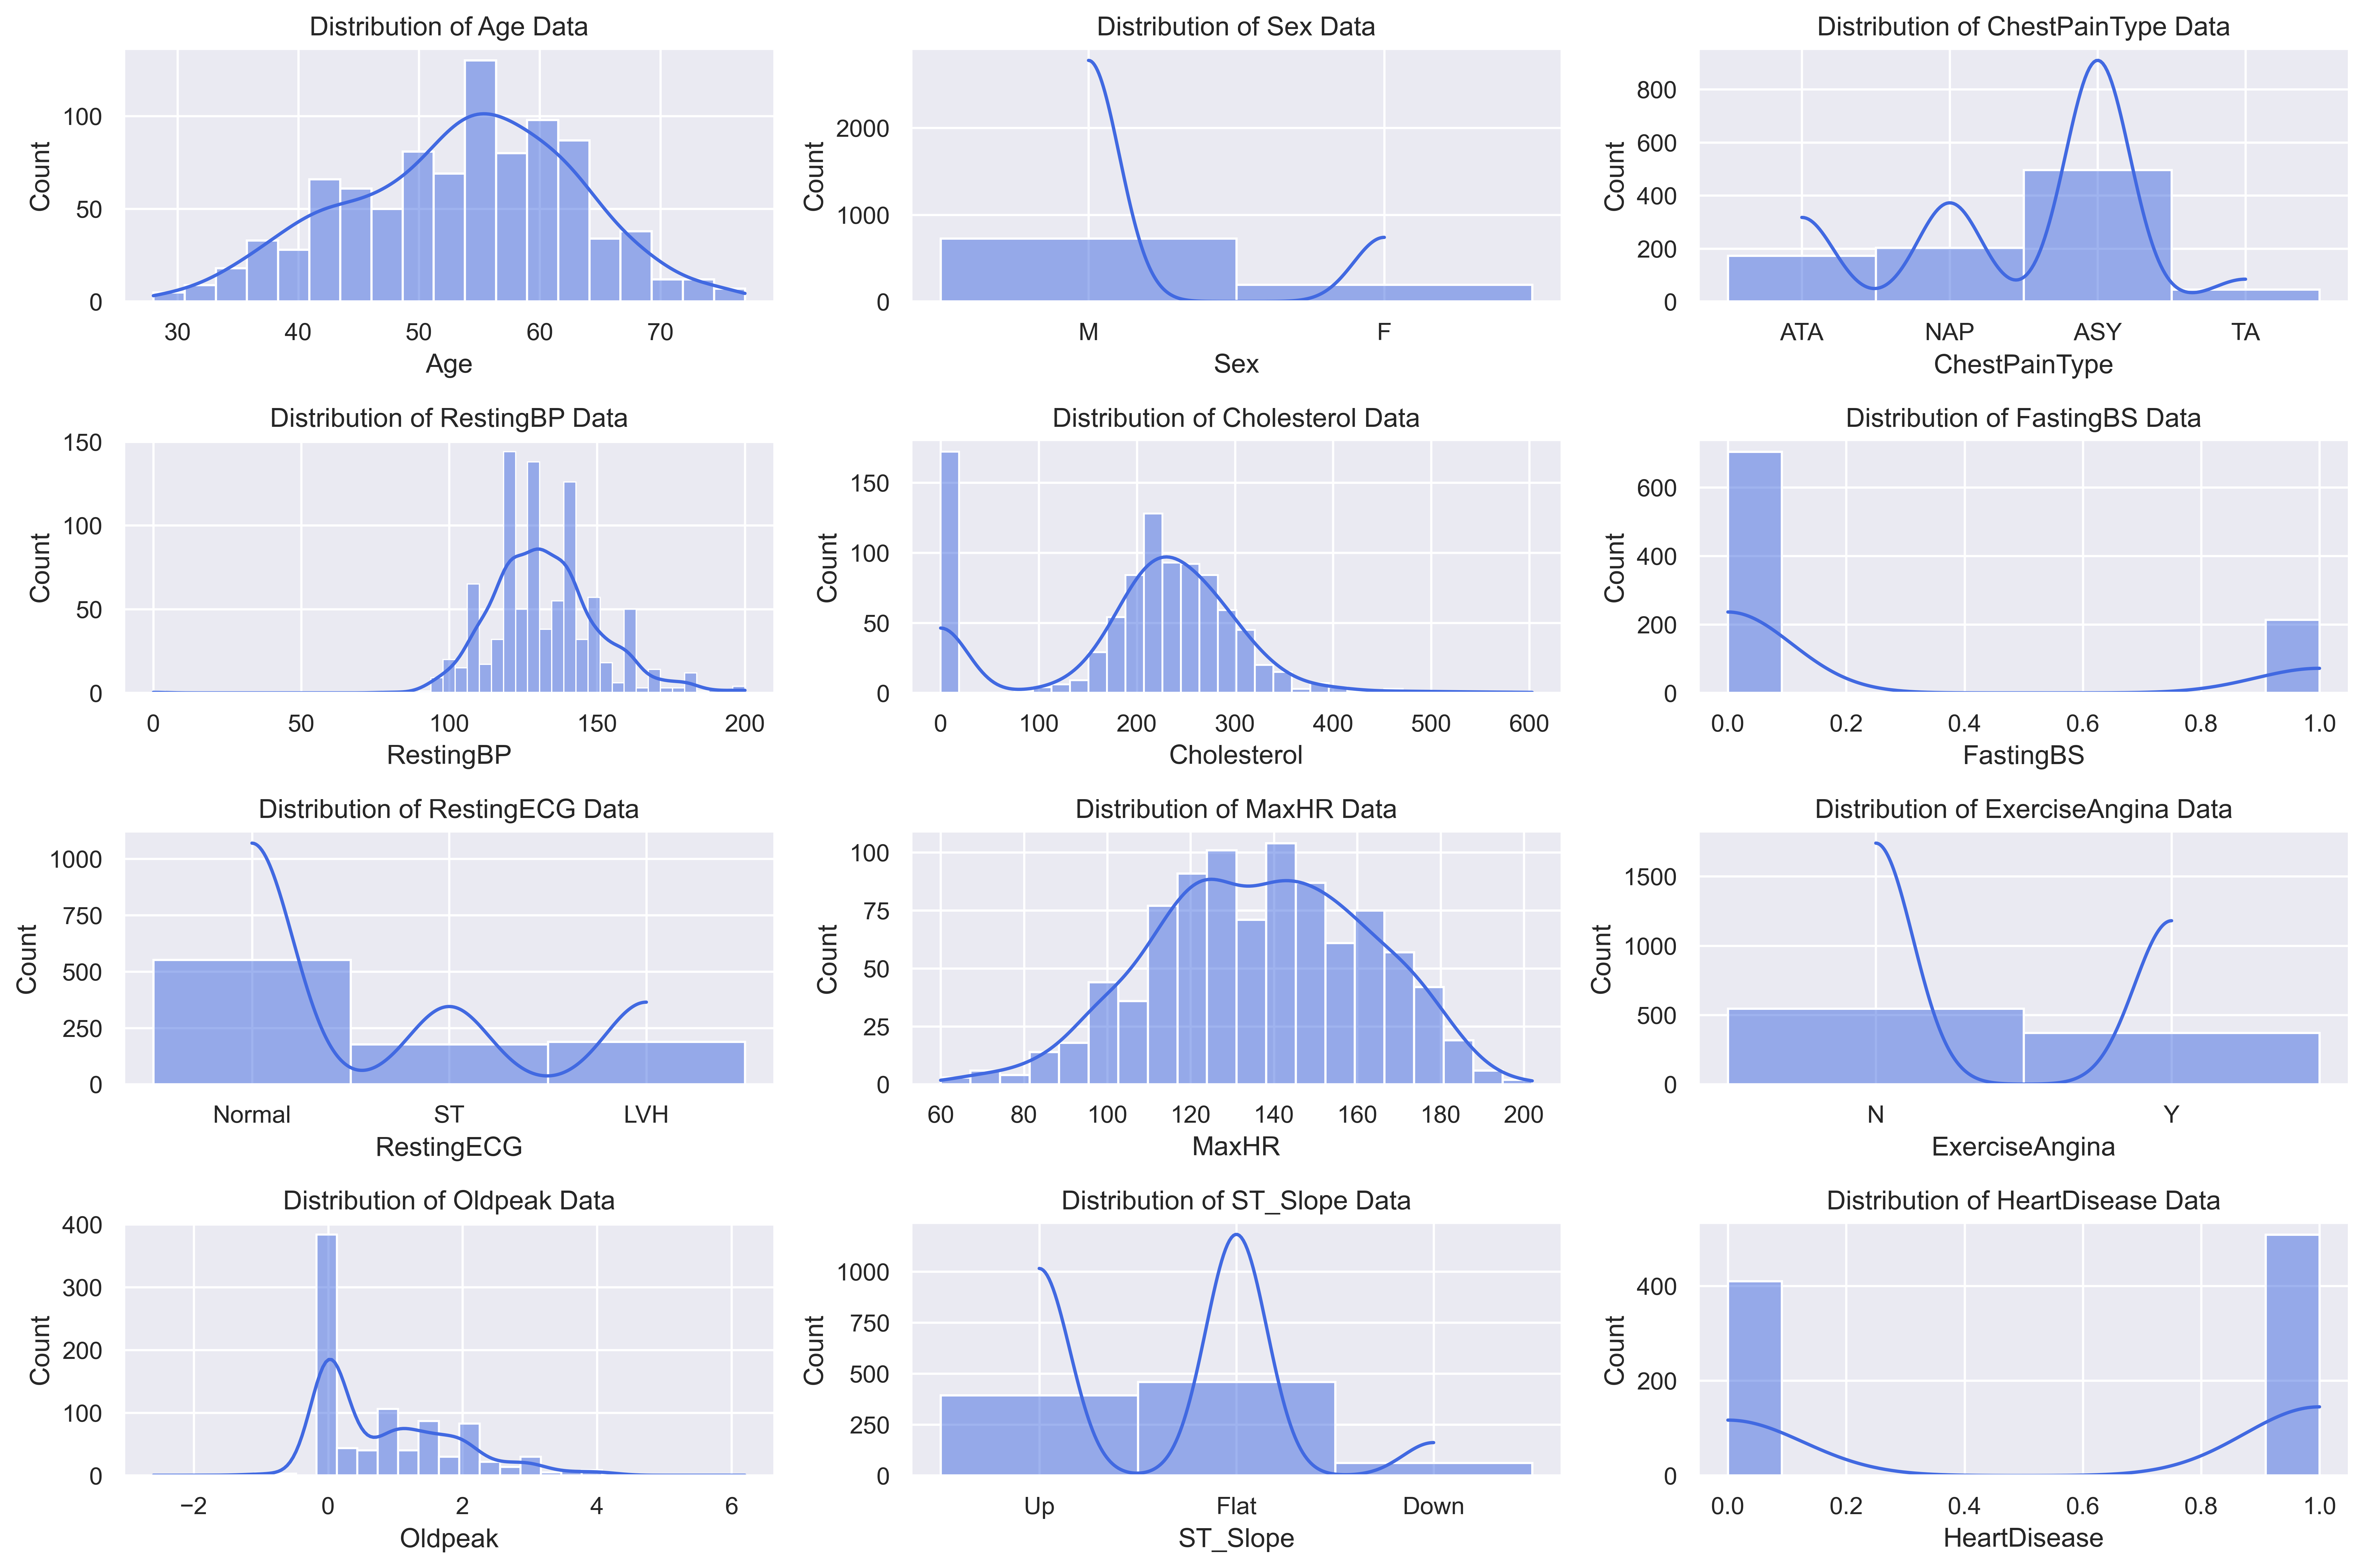

In [25]:
plt.figure(figsize=(15, 10), dpi=500)

for i, col in enumerate(df.columns, 1):

    plt.subplot(4, 3, i)
    plt.title(f"Distribution of {col} Data")

    sns.histplot(
        data=df[col],
        kde=True,
        color="royalblue",
    )

    plt.tight_layout()
    plt.plot()

In [28]:
string_col = df.select_dtypes("object").columns
string_col

label_encode = LabelEncoder()

for col in string_col:
    df[col] = label_encode.fit_transform(df[col])

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


## Model Training without PCA


### Logistic Regression


In [34]:
Target = df["HeartDisease"]
Features = df.drop("HeartDisease", axis=1)

In [35]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(Features)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    scaled_features,
    Target,
    test_size=0.3,
    random_state=101,
)

In [38]:
log_model = LogisticRegression()

In [39]:
log_model.fit(X_train, y_train)

LogisticRegression()

In [41]:
log_predict = log_model.predict(X_test)

In [43]:
print(classification_report(y_test, log_predict))
print("\n")
print(confusion_matrix(y_test, log_predict))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82       126
           1       0.84      0.87      0.86       150

    accuracy                           0.84       276
   macro avg       0.84      0.84      0.84       276
weighted avg       0.84      0.84      0.84       276



[[101  25]
 [ 19 131]]


In [49]:
Accuracy = accuracy_score(y_test, y_pred=log_predict)
print(f"Logistic Regression Accuracy: {int(Accuracy*100)}%")

Logistic Regression Accuracy: 84%


### KNN Model


In [50]:
knn = KNeighborsClassifier()

In [51]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [58]:
knn_predict = knn.predict(X_test)

In [59]:
print(classification_report(y_test, knn_predict))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       126
           1       0.86      0.83      0.84       150

    accuracy                           0.83       276
   macro avg       0.83      0.83      0.83       276
weighted avg       0.83      0.83      0.83       276



In [60]:
print(confusion_matrix(y_test, knn_predict))

[[105  21]
 [ 25 125]]


In [62]:
Accuracy = accuracy_score(y_test, y_pred=knn_predict)
print(f"Logistic Regression Accuracy: {int(Accuracy*100)}%")

Logistic Regression Accuracy: 83%
